# FAKE NEWS DETECTION USING NPL AND GloVe

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import itertools

IMPORTING THE DATASET

In [2]:
true = pd.read_csv("./True.csv")
false = pd.read_csv("./Fake.csv")

DATA VISUALIZATION AND PREPROCESSING

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Making a new header in dataset for true and false news
true['category'] = 1
false['category'] = 0

In [6]:
# Merging the 2 dataset
df = pd.concat([true, false])

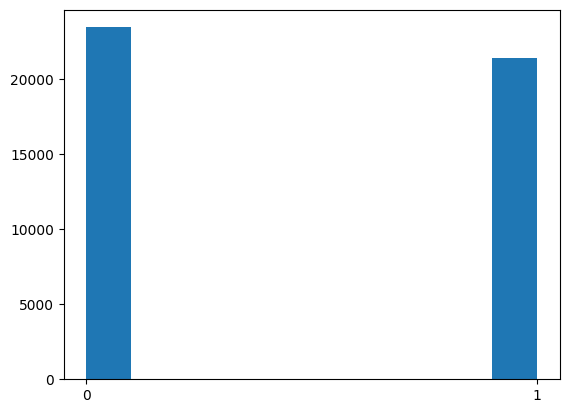

In [7]:
plt.hist(df.category)
plt.xticks([0, 1])
plt.show()

In [8]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
# checking for nan values
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [10]:
df.title.count()

44898

In [11]:
df.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [12]:
# Shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df.head()

,title,text,subject,date,category
0,"Ryan calls Trump, Cruz to discuss House Republ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"March 8, 2016",1
1,"IS RESIGNATION OF FBI DIRECTOR IMMINENT, As Ob...","FBI insiders are spreading the word, Hillary C...",politics,"Mar 22, 2016",0
2,"Japan's 'Dennis Rodman', ex-wrestler Inoki, ur...",TOKYO (Reuters) - The standoff over North Kore...,worldnews,"September 13, 2017",1
3,"U.S. Navy plane crashes in Philippine Sea, thr...",TOKYO (Reuters) - A U.S. Navy transport plane ...,worldnews,"November 22, 2017",1
4,Russia: Syria opposition sabotages Geneva talk...,MOSCOW (Reuters) - Syria s opposition is sabot...,worldnews,"December 21, 2017",1


In [14]:
df.shape

(44898, 5)

In [15]:
df['text'] = df['subject'] + df['title'] + df['text'] 
df.drop(columns=['title', 'subject', 'date'], inplace=True)

In [16]:
df.head()

,text,category
0,"politicsNewsRyan calls Trump, Cruz to discuss ...",1
1,politicsIS RESIGNATION OF FBI DIRECTOR IMMINEN...,0
2,"worldnewsJapan's 'Dennis Rodman', ex-wrestler ...",1
3,worldnewsU.S. Navy plane crashes in Philippine...,1
4,worldnewsRussia: Syria opposition sabotages Ge...,1


## DATA CLEANING

In [17]:
messages = df.copy()
messages.reset_index(inplace=True)

In [18]:
messages.head()

,index,text,category
0,0,"politicsNewsRyan calls Trump, Cruz to discuss ...",1
1,1,politicsIS RESIGNATION OF FBI DIRECTOR IMMINEN...,0
2,2,"worldnewsJapan's 'Dennis Rodman', ex-wrestler ...",1
3,3,worldnewsU.S. Navy plane crashes in Philippine...,1
4,4,worldnewsRussia: Syria opposition sabotages Ge...,1


In [19]:
messages['text'][4]

'worldnewsRussia: Syria opposition sabotages Geneva talks to ruin proposed national congress: TASSMOSCOW (Reuters) - Syria s opposition is sabotaging the Geneva peace talks in a bid to ruin Russia s preparations for a planned congress of national dialogue in Syria, the TASS news agency cited Russian Foreign Ministry spokeswoman Maria Zakharova as saying on Thursday. '

In [20]:
messages['text'][44894]

"worldnewsRamping up rhetoric, Turkey's Erdogan chastises U.S. over democracyISTANBUL/ANKARA (Reuters) - Turkish President Tayyip Erdogan showed no retreat from a diplomatic row with the United States on Saturday, castigating Washington for what he said an  undemocratic  indictment against his security detail. His comments may further dash hopes of a quick resolution to an on-going diplomatic crisis between the NATO allies. Both Ankara and Washington have cut back issuing visas to each other s citizens as ties have worsened.  They say the United States is the cradle of democracy. This can t be true. This can t be democracy,  Erdogan said in a speech in Istanbul.   If arrest warrants are issued against my bodyguards in absentia ... in the United States, where I went upon invitation, excuse me but I will not say this is a civilized country.  A U.S. grand jury in August indicted 15 Turkish security officials over a brawl between protesters and Erdogan s security personnel during the Turki

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
corpus= []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    
    all_stopwords = set(stopwords.words('english'))
    words_to_remove = [
        'not', 'no', 'never', 'none',
        'news', 'article', 'story', 'report', 'information', 'source', 'publication',
        'very', 'much', 'many', 'more', 'most', 'some', 'few',
        'and', 'but', 'or', 'for', 'with', 'by', 'from', 'in', 'on', 'at',
        'said', 'told', 'according', 'states', 'claimed', 'alleges',
        'according to', 'as reported by', 'in response to', 'based on',
        'today', 'yesterday', 'tomorrow', 'now', 'recently', 'currently'
    ]
    all_stopwords = all_stopwords - set(words_to_remove)

    review = [ps.stem(word) for word in review if not word in all_stopwords]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aman9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus[4]

'worldnewsrussia syria opposit sabotag geneva talk ruin propos nation congress tassmoscow reuter syria opposit sabotag geneva peac talk in bid ruin russia prepar for plan congress nation dialogu in syria tass news agenc cite russian foreign ministri spokeswoman maria zakharova say on thursday'

In [23]:
corpus[44894]

'worldnewsramp rhetor turkey erdogan chastis u democracyistanbul ankara reuter turkish presid tayyip erdogan show no retreat from diplomat row with unit state on saturday castig washington for said undemocrat indict secur detail comment may dash hope quick resolut on go diplomat crisi nato alli ankara and washington cut back issu visa citizen tie worsen say unit state cradl democraci true democraci erdogan said in speech in istanbul arrest warrant issu bodyguard in absentia in unit state went upon invit excus but not say civil countri u grand juri in august indict turkish secur offici brawl protest and erdogan secur personnel turkish presid visit washington in may erdogan said indict not bind for ankara row deepen turkish author arrest two u consular staff turkish nation in may translat at consul in southern provinc adana arrest and two week ago drug enforc administr dea worker detain in istanbul accus link last year fail coup u embassi said accus baseless turkish polic want question t

BAG OF WORDS

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(max_features=14000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [26]:
X.shape

(44898, 14000)

In [27]:
cv.vocabulary_

{'call': 2121,
 'trump': 12666,
 'cruz': 3116,
 'discuss': 3569,
 'hous': 5663,
 'republican': 10391,
 'agenda': 197,
 'reuter': 10528,
 'repres': 10378,
 'speaker': 11661,
 'paul': 9268,
 'ryan': 10773,
 'presidenti': 9762,
 'candid': 2174,
 'donald': 3657,
 'and': 403,
 'ted': 12283,
 'senat': 11181,
 'from': 4953,
 'texa': 12352,
 'brief': 1847,
 'on': 8709,
 'attempt': 1368,
 'creat': 3044,
 'bold': 1765,
 'elect': 3837,
 'year': 13909,
 'hill': 5575,
 'newspap': 8286,
 'report': 10355,
 'monday': 7906,
 'also': 299,
 'marco': 7543,
 'rubio': 10713,
 'florida': 4504,
 'ohio': 8684,
 'governor': 5288,
 'john': 6774,
 'kasich': 6869,
 'contend': 2851,
 'for': 4534,
 'nomin': 8364,
 'nov': 8538,
 'quot': 10051,
 'aid': 221,
 'say': 10997,
 'no': 8327,
 'inform': 6451,
 'given': 5192,
 'paper': 9174,
 'said': 10798,
 'by': 1994,
 'eric': 4019,
 'walsh': 13340,
 'edit': 3803,
 'peter': 9411,
 'articl': 1203,
 'fund': 5060,
 'in': 5885,
 'part': 9199,
 'sap': 10966,
 'independ': 6414,
 '

In [28]:
y = messages['category']

FREQUENT REAL WORDS

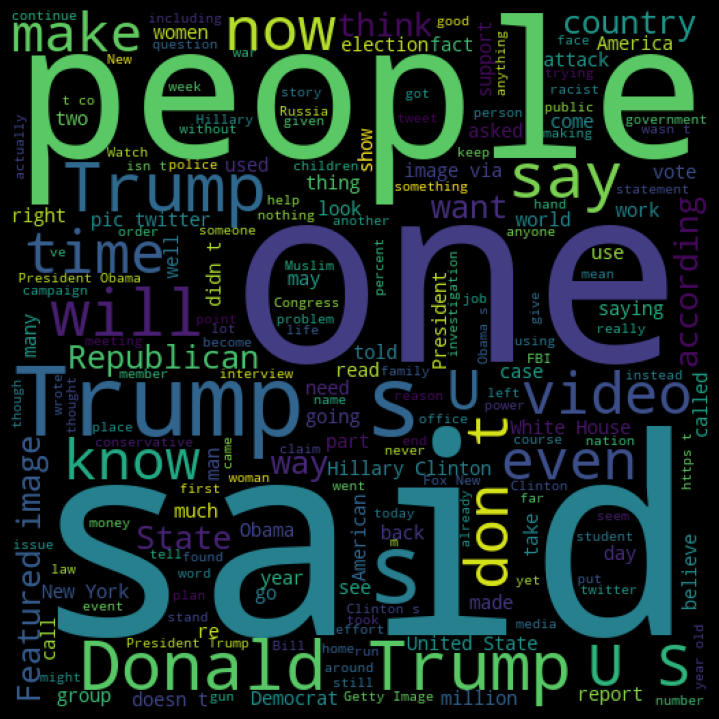

In [29]:
real = ' '.join(list(messages[messages['category']==0]['text']))
real = WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

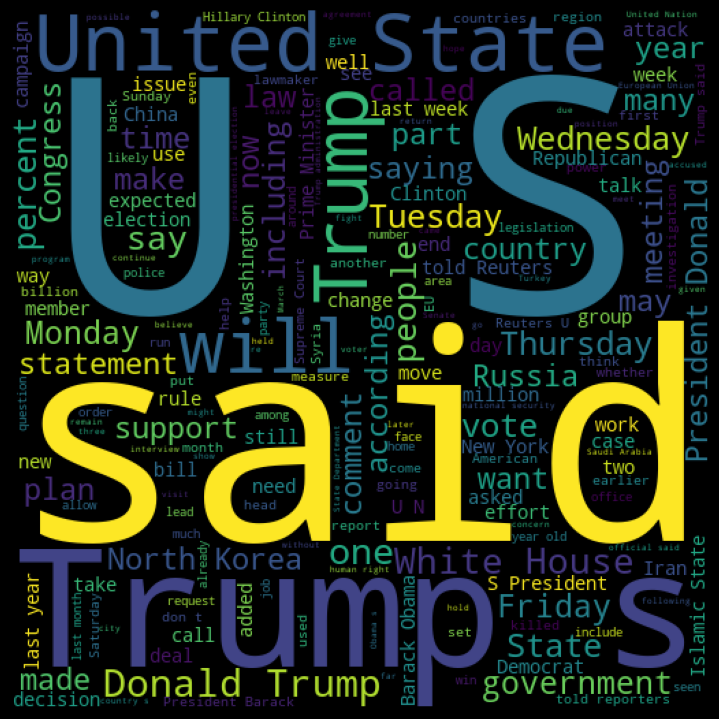

In [30]:
fake = ' '.join(list(messages[messages['category']==1]['text']))
fake = WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

SPLITTING THE DATASET IN TEST AND TRANING SET

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0)

In [32]:
cv.get_feature_names_out()[:500]

array(['aaron', 'abadi', 'abandon', 'abba', 'abbott', 'abc', 'abc news',
       'abc week', 'abdel', 'abduct', 'abdullah', 'abe', 'abedin', 'abid',
       'abid by', 'abil', 'abl', 'abl get', 'aboard', 'abolish', 'abort',
       'abort and', 'abroad', 'abruptli', 'absenc', 'absent', 'absolut',
       'absolut no', 'absolut noth', 'absurd', 'abu', 'abus', 'abus and',
       'abus power', 'aca', 'academ', 'academi', 'acceler', 'accept',
       'access', 'accid', 'accident', 'accommod', 'accompani',
       'accompani by', 'accomplish', 'accord', 'accord court',
       'accord document', 'accord new', 'accord new york',
       'accord offici', 'accord polic', 'accord report', 'accord reuter',
       'accord reuter ipso', 'accord sourc', 'accord state',
       'accord statement', 'accord washington', 'accord with', 'account',
       'account and', 'account for', 'accur', 'accuraci', 'accus',
       'accus by', 'accus presid', 'accus sexual', 'accus trump',
       'achiev', 'acknowledg', 'ac

In [33]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 14000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [35]:
count_df.head()

,aaron,abadi,abandon,abba,abbott,abc,abc news,abc week,abdel,abduct,...,zika,zika viru,zimbabw,zimbabwean,zink,zone,zone in,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


FUNCTION FOR PRINTS AND PLOTING OF CONFUSION MATRIX

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

MultinomialNB Algorithm

In [37]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [38]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

accuracy:   0.968
Confusion matrix, without normalization


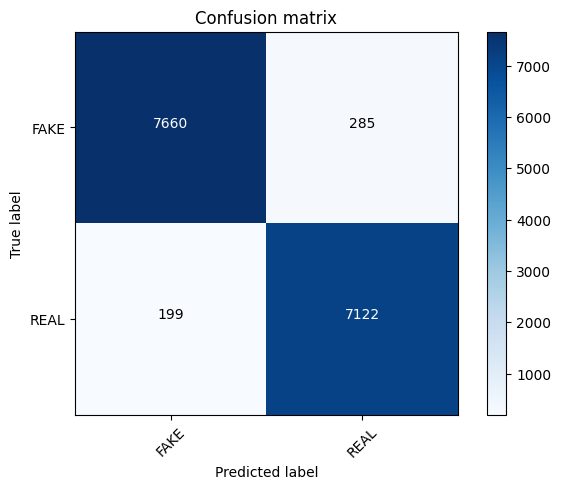

In [39]:
from sklearn import metrics
MultinomialNBModel = classifier.fit(X_train, y_train)
pred = MultinomialNBModel.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [40]:
import joblib

joblib.dump(MultinomialNBModel, 'test_model.pkl')

['test_model.pkl']

In [41]:
joblib.dump(cv, 'countVectorizer_model.pkl')

['countVectorizer_model.pkl']